# Cu recovery case study

Elvis Eugene, William Phillip, Alexander Dowling

Scripts to generate results for the Cu recovery case study based on Li recovery study in _**Material property targets to enable adsorptive water treatment and resource recovery systems**_

#### Load  libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import multiscale_adsorption_target_models as mat # python model and workflow functions

#### Define constant parameters for Li recovery study

In [2]:
# output verbosity
print_level = 3

# Cu+ concentration
# Based on https://www.sciencedirect.com/science/article/pii/S0043135497004491
cin_mgL_Cu = 20 # mg/l
mw_Cu = 63.54e-3 # g/mmol

# unit conversions
l_to_cm3 = 1e-3
g_to_mg = 1e-3

# convert to mmol/cm3
cin_Cu = (cin_mgL_Cu*l_to_cm3*g_to_mg) / mw_Cu # [mmol/cm3]

if print_level >=3:
    print("cin_Cu =",cin_Cu,"mmol/cm^3")
# END print

rho_Cu = 8.96 # [g/cm3]

v_s_bar_Cu = mw_Cu / rho_Cu # [cm3/mmol]

if print_level >= 3:
    print('v_s_bar_Cu [cm3/mmol] = \n ',v_s_bar_Cu)
# END print

# operating pressure
# approx pressure for nanofiltration membranes
delP_psi_Cu = 200 # [psi]
delP_Cu = delP_psi_Cu * 6894.76 # [Pa]

# ratio of membrane masses to extract unit mass of Cu
m_mem_ratio_matrix = np.array([25, 50, 100, 250, 500])

# path to existing adsorbent data
path = 'copper_adsorbents_2.csv'
# path = None

# sorbent properties and mass transfer characteristics
eps_bed = 0.4 # [-*], packed bed void fraction
eps_part = 0.57 # [-*], porosity of particle
rho_mat = 1 # g cm-3, density of sorbent matrix
n_ps = 1.46e9 # [-], number of pores per spherical particle
Np_mem = 1.6e14/100**2; # [1/cm2] number of pores per unit area of membrane
mu = 8.9e-4 # [Pa-s], viscosity of water at room temperature
D_AB = 1e-5 # [cm2/s] solute diffusivity

# volume to be treated and time for treatment
v_total_Cu = 1000e6 # cm3
t_total = np.array([6*30*86400]) # s

# constants
n_a = 6.022e20 # [1/mmol] Avogadro's number

cin_Cu = 0.00031476235442241113 mmol/cm^3
v_s_bar_Cu [cm3/mmol] = 
  0.007091517857142856


## Baseline membrane targets

#### Define parameters

In [3]:
# membrane thickness 
l_mem_baseline = 1e-3 # [m]

# membrane porosity
eps_mem_baseline = 0.3 # [-*]

case1_name = 'Cu_6month_regen_baseline' # unique identifier for this case

#### Calculate material property targets and baseline membrane-based limits on material properties

In [4]:
K, QC_Cu, K_qmax, qmax = mat.calc_lithium_targets(cin_Cu, v_s_bar_Cu, delP_Cu, l_mem_baseline, eps_mem_baseline,
                                                  m_mem_ratio_matrix, t_total, batch_targets=False, removal_ratio=None, 
                                                  print_level=print_level, calc_masses=False, path=path, casename=case1_name)

Printing from calc_lithium_targets
System parameters for Li targets calculation:
   cin_Li [mmol/cm3]  v_s_bar_Li [cm3/mmol]  delP_Li [Pa]  l_mem [m]  eps [-]  \
0           0.000315               0.007092     1378952.0      0.001      0.3   

   t_total [s]  
0     15552000  
li_recovered= 1000  kg
v_total= 457715026653.2199  cm3
m_mem [kg]=
 [ 25000  50000 100000 250000 500000]
v_mem_updated [m3]=
 [ 35.71428571  71.42857143 142.85714286 357.14285714 714.28571429]
rho_mem_updated_SI [kg/m3] = 
 700.0
nbv_updated=
 [12816.02074629  6408.01037315  3204.00518657  1281.60207463
   640.80103731]
i= 0
nbv_limit_soln= (array([6298.61831674]), {'nfev': 8, 'fjac': array([[-1.]]), 'r': array([1.2499887]), 'qtf': array([-3.46006254e-06]), 'fvec': array([9.09494702e-13])}, 1, 'The solution converged.')


## Optimized membrane targets

#### Define parameters

In [5]:
# membrane thickness 
l_mem_opt = 0.3e-3 # [m]

# membrane porosity
eps_mem_opt = 0.5 # [-]

case2_name = 'Cu_6month_regen_opt' # unique identifier for this case

#### Calculate material property targets and baseline membrane-based limits on material properties

In [6]:
K_opt, QC_Cu_opt, K_qmax_opt, qmax_opt = mat.calc_lithium_targets(cin_Cu, v_s_bar_Cu, delP_Cu, l_mem_opt, 
                                                                  eps_mem_opt, m_mem_ratio_matrix,
                                                                  t_total, batch_targets=False, 
                                                                  removal_ratio=None, print_level=print_level, 
                                                                  calc_masses=False, path=path,
                                                                  casename=case2_name)

Printing from calc_lithium_targets
System parameters for Li targets calculation:
   cin_Li [mmol/cm3]  v_s_bar_Li [cm3/mmol]  delP_Li [Pa]  l_mem [m]  eps [-]  \
0           0.000315               0.007092     1378952.0     0.0003      0.5   

   t_total [s]  
0     15552000  
li_recovered= 1000  kg
v_total= 457715026653.2199  cm3
m_mem [kg]=
 [ 25000  50000 100000 250000 500000]
v_mem_updated [m3]=
 [  50.  100.  200.  500. 1000.]
rho_mem_updated_SI [kg/m3] = 
 500.0
nbv_updated=
 [9154.30053306 4577.15026653 2288.57513327  915.43005331  457.71502665]
i= 0
nbv_limit_soln= (array([15341.59679569]), {'nfev': 9, 'fjac': array([[-1.]]), 'r': array([1.24999212]), 'qtf': array([-2.5533609e-06]), 'fvec': array([-1.8189894e-12])}, 1, 'The solution converged.')


## Packed bed design criteria

#### Calculate packed-bed design criteria

In [7]:
mat.qmax_heatmaps(case1_name,eps_bed,eps_part,eps_mem_baseline,cin_Cu,v_s_bar_Cu,
                  v_total_Cu,t_total,delP_Cu,K_lim=[-3,9],Q_lim=[-2,7],n_el=100,
                  plot_existing=False,K_exist=None,Q_exist=None,d_pore_min_max=[1e-7,1e-5],
                  d_pore_mem_min_max=[1e-7,1e-5],plot_contours=False)

Saved K values to Cu_6month_regen_baselineK_x.csv
Saved Q values to Cu_6month_regen_baselineQ_y.csv
Saved lub_bar values to Cu_6month_regen_baselinelub_bar.csv


#### Plot MPT contours with bed design limits
This code generates Fig 4A of the manuscript

Printing from plot_lithium_targets()
cu_Ks: [0.02581051 0.03462386 0.05917532 2.01447907 6.42115203        nan
        nan        nan        nan]
cu_Qs: [ 2541.6   1143.72  3272.31  3812.4  12580.92      nan      nan      nan
      nan]


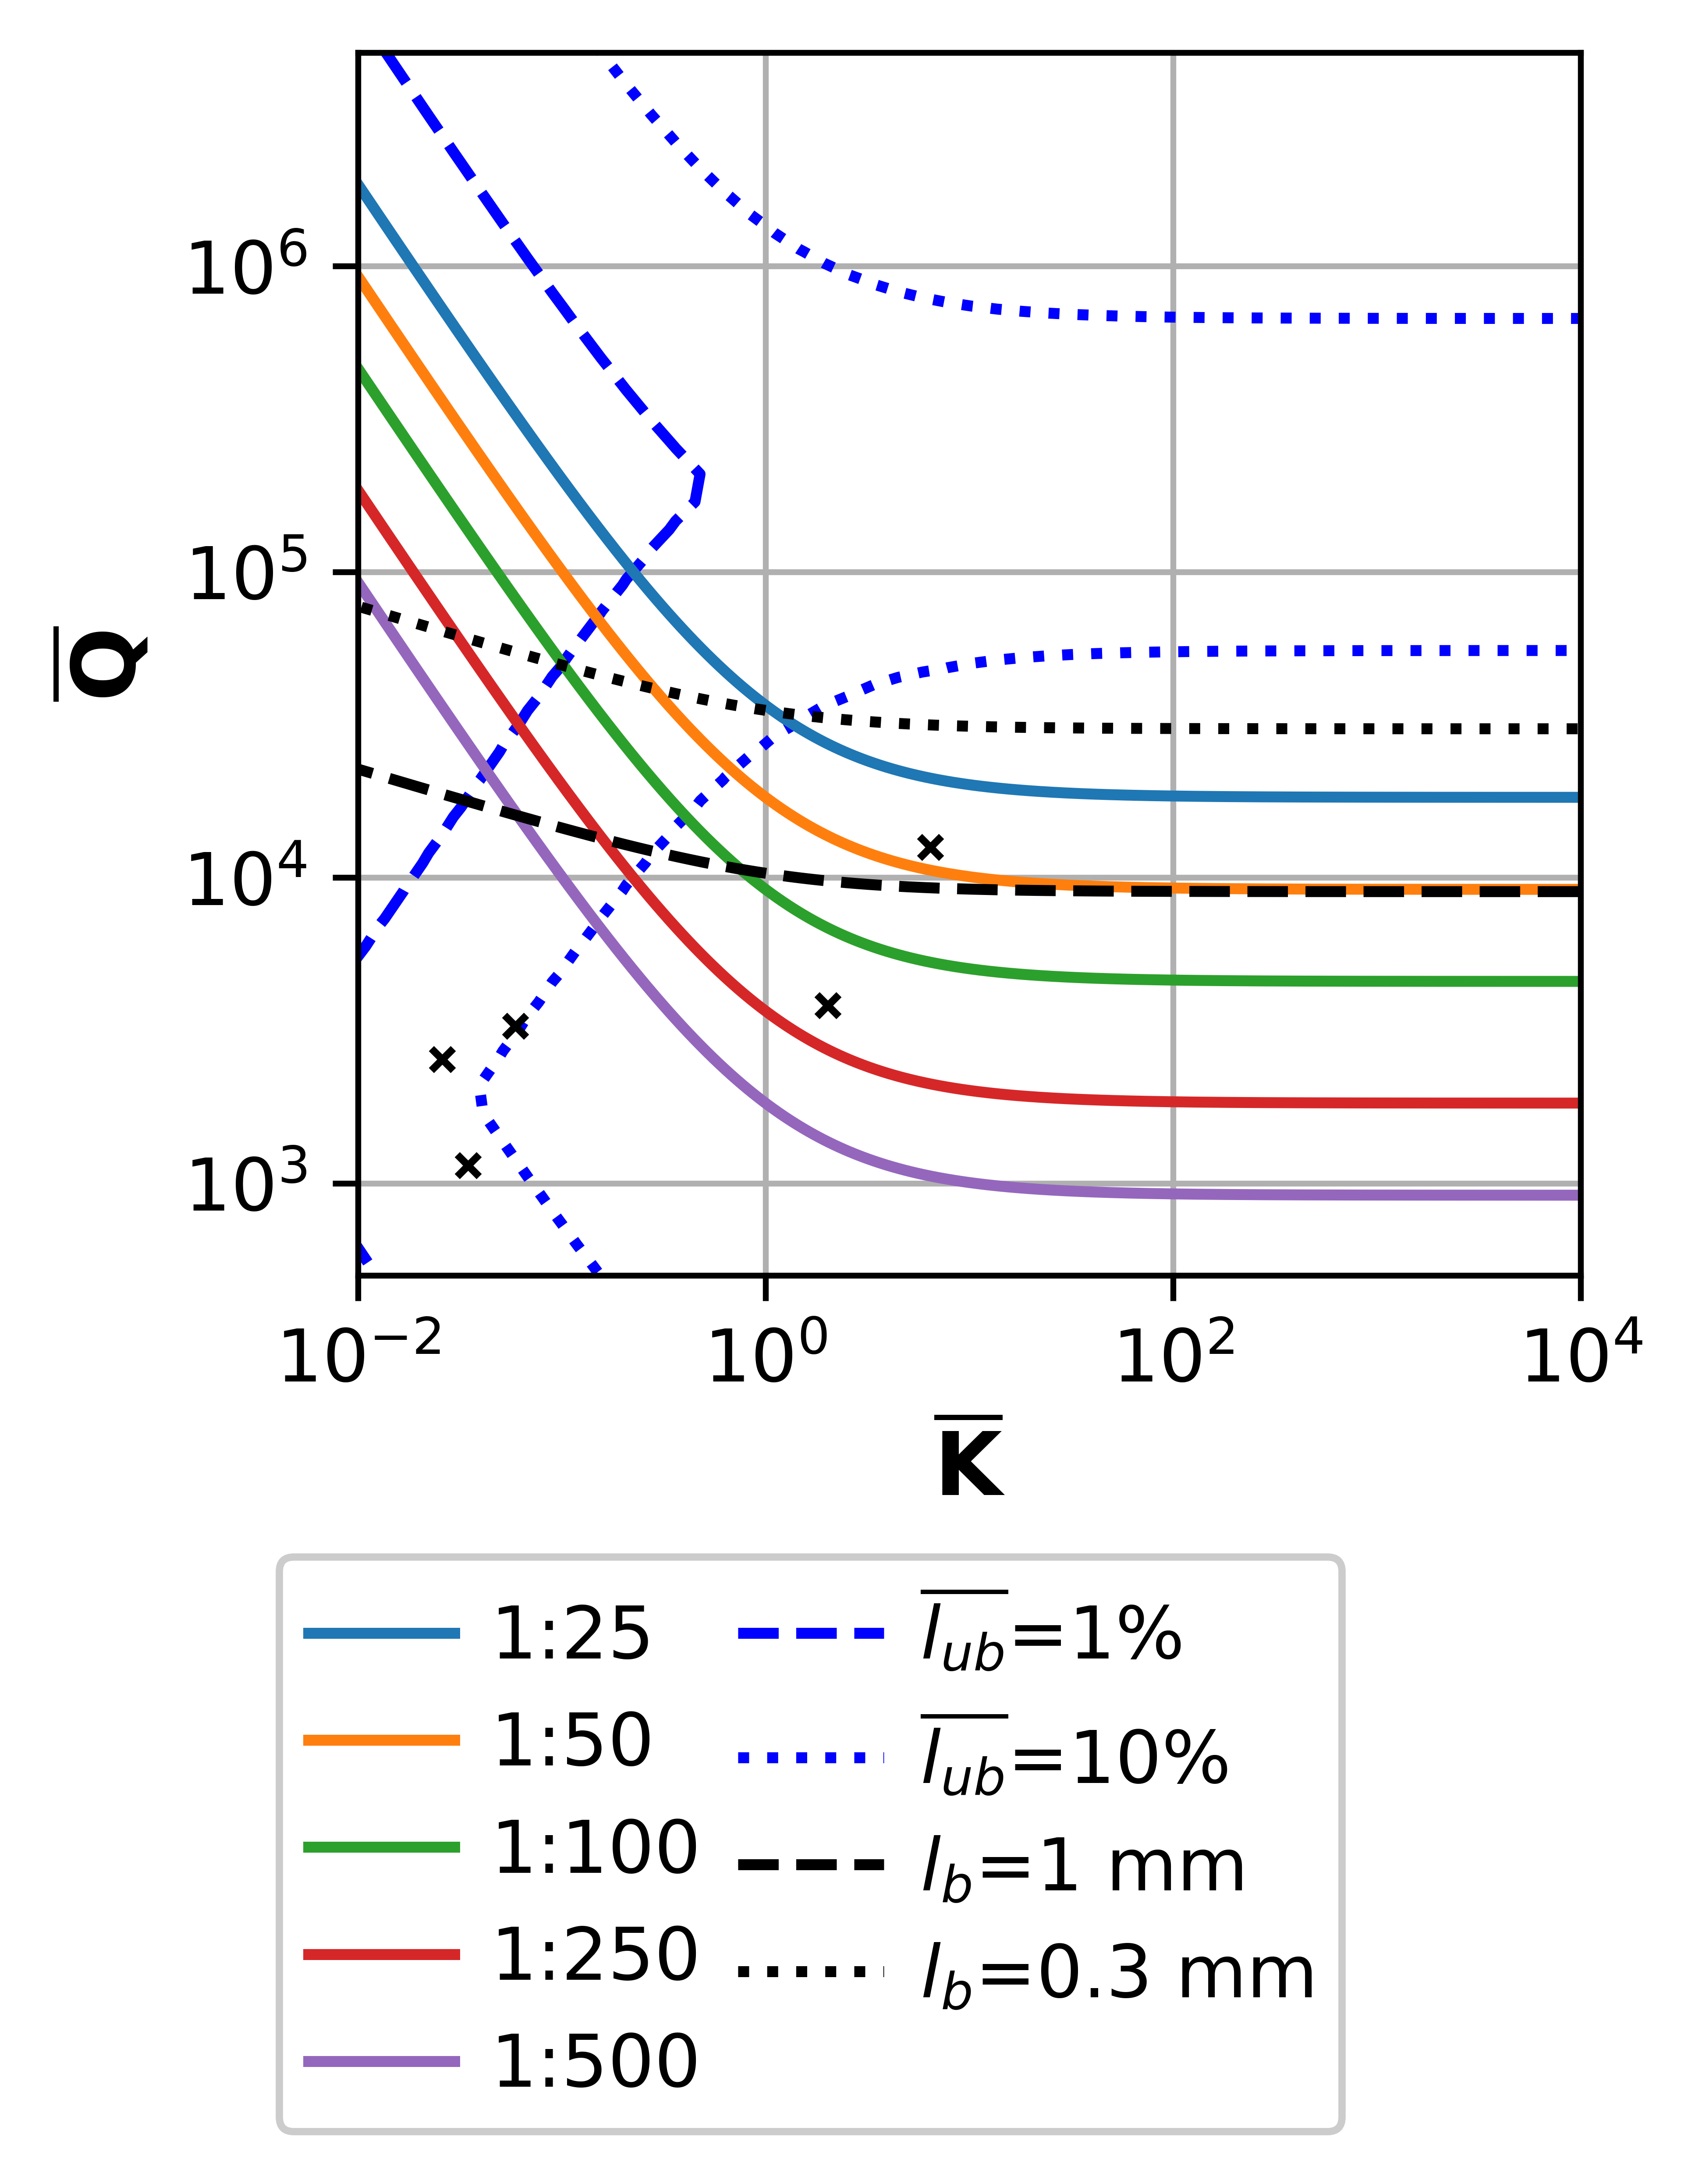

In [8]:
# assemble np.arrays for binding affinity and saturation capacity limits [baseline, optimized]
K_qmax_plot = np.array([K_qmax[0,:],K_qmax_opt[0,:]])
qmax_plot = np.array([qmax[0,:],qmax_opt[0,:]])

# define figure name
figname = case1_name

fig_Cu_case1_mem, ax_Cu_case1_mem =\
mat.plot_copper_targets(K_opt, QC_Cu_opt, K_qmax_plot, qmax_plot, 
                         m_mem_ratio_matrix, cin_Cu, eps_mem_opt, t_total,
                         path, figname, print_level=print_level, dimensionless=True,
                         combined_plot=True,
                         pbed_qmax_path = case1_name,
                         mem_Qmax_labels=['1 mm', '0.3 mm'])

# adjust axis limits
# format y-axis
plt.ylim(5e2,5e6)
# ax_Cu_case1_mem.set_yticks([1e0,1e1,1e2])

# format x-axis
plt.xlim(1e-2,1e4)
# ax_Cu_case1_mem.set_xticks([1e-2,1e0,1e2,1e4])

# square aspect ratio
mat.set_aspect_ratio_log(ax_Cu_case1_mem, 1.0)

# save figure again after updating aesthetics
plt.savefig(figname+'.png',dpi=300,bbox_inches='tight')

plt.show()